# Intro to Geopandas

In [1]:
import geopandas as gpd

In [2]:
df = gpd.read_file('/content/ne_10m_admin_0_countries.shp')

In [3]:
df = df[['SOV_A3','ADMIN','geometry']]
df.columns = ['iso','admin','geometry']

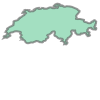

In [ ]:
df[df.iso=='CHE'].geometry.values[0]

In [ ]:
type(df[df.iso=='CHE'].geometry.values[0])

shapely.geometry.polygon.Polygon

<Axes: >

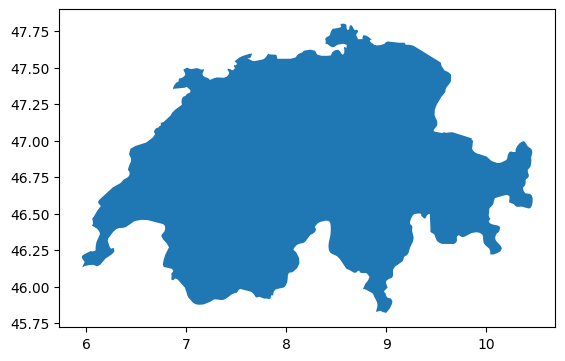

In [ ]:
df[df.iso=='CHE'].plot()

<Axes: >

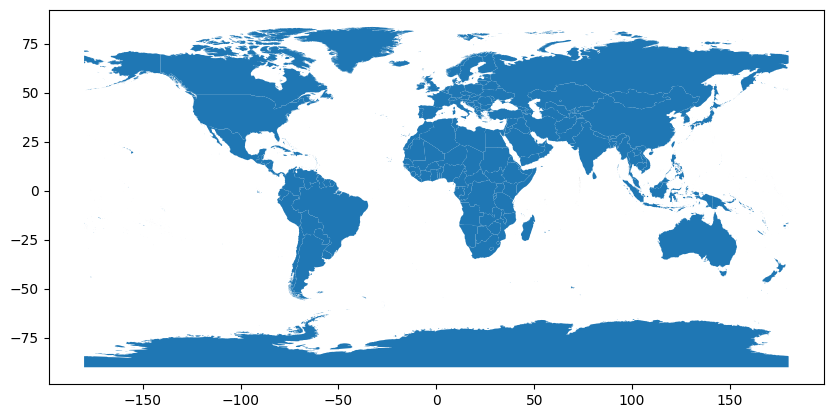

In [ ]:
df.plot(figsize=(10,6))

In [ ]:
df[df.iso=='CHE'].geometry.values[0].area

4.882623254185493

In [ ]:
df[df.iso=='US1'].geometry.values[0].area

1116.350128624435

In [ ]:
df[df.iso=='CAN'].geometry.values[0].area

1691.8807114722586

In [ ]:
df[df.iso=='CH1'].geometry.values[0].area

951.1780840917214

# Remember the CRS!

In [ ]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Pick your Projection!


## World Cylindrical Equal Area Projection

In [4]:
world = df.to_crs('esri:54034').copy()

In [ ]:
world.crs

<Projected CRS: ESRI:54034>
Name: World_Cylindrical_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Cylindrical_Equal_Area
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
world

,iso,admin,geometry
0,IDN,Indonesia,"MULTIPOLYGON (((13102705.696 459972.334, 13102..."
1,MYS,Malaysia,"MULTIPOLYGON (((13102705.696 459972.334, 13101..."
2,CHL,Chile,"MULTIPOLYGON (((-7737827.685 -1906568.179, -77..."
3,BOL,Bolivia,"POLYGON ((-7737827.685 -1906568.179, -7737828...."
4,PER,Peru,"MULTIPOLYGON (((-7737827.685 -1906568.179, -77..."
...,...,...,...
253,CH1,Macao S.A.R,"MULTIPOLYGON (((12641286.013 2391521.385, 1264..."
254,AU1,Ashmore and Cartier Islands,"POLYGON ((13758756.865 -1363782.602, 13758838...."
255,BJN,Bajo Nuevo Bank (Petrel Is.),"POLYGON ((-8904366.797 1725048.000, -8904203.7..."
256,SER,Serranilla Bank,"POLYGON ((-8753839.074 1732197.436, -8754210.5..."


In [ ]:
df

,iso,admin,geometry
0,IDN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...
253,CH1,Macao S.A.R,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,AU1,Ashmore and Cartier Islands,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,BJN,Bajo Nuevo Bank (Petrel Is.),"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,SER,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


<Axes: >

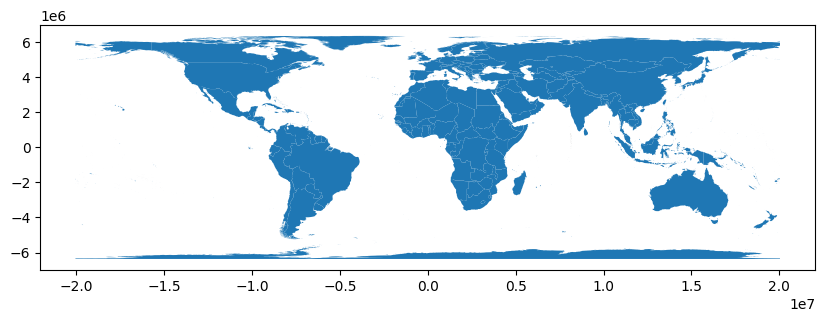

In [ ]:
world.plot(figsize=(10,6))

In [5]:
world['area_sqkm_cea'] = world.geometry.area/10**6

In [ ]:
world.head()

,iso,admin,geometry,area_sqkm_cea
0,IDN,Indonesia,"MULTIPOLYGON (((13102705.696 459972.334, 13102...",1.879826e+06
1,MYS,Malaysia,"MULTIPOLYGON (((13102705.696 459972.334, 13101...",3.278846e+05
2,CHL,Chile,"MULTIPOLYGON (((-7737827.685 -1906568.179, -77...",7.365950e+05
3,BOL,Bolivia,"POLYGON ((-7737827.685 -1906568.179, -7737828....",1.086808e+06
4,PER,Peru,"MULTIPOLYGON (((-7737827.685 -1906568.179, -77...",1.289867e+06


In [ ]:
world[world.iso == 'CHE']

,iso,admin,geometry,area_sqkm_cea
91,CHE,Switzerland,"POLYGON ((1163712.926 4634233.125, 1163126.161...",41435.486668


In [6]:
world_lcea = world.to_crs('epsg:3410')
world_lcea.crs

<Projected CRS: EPSG:3410>
Name: NSIDC EASE-Grid Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC Equal Area global projection
- method: Lambert Cylindrical Equal Area (Spherical)
Datum: NSIDC International 1924 Authalic Sphere
- Ellipsoid: International 1924 Authalic Sphere
- Prime Meridian: Greenwich

In [7]:
world_lcea['area_sqkm_lcea'] = world_lcea.geometry.area/10**6

In [ ]:
world_lcea

,iso,admin,geometry,area_sqkm_cea,area_sqkm_lcea
0,IDN,Indonesia,"MULTIPOLYGON (((11334984.263 534118.072, 11334...",1.879826e+06,1.879826e+06
1,MYS,Malaysia,"MULTIPOLYGON (((11334984.263 534118.072, 11334...",3.278846e+05,3.278846e+05
2,CHL,Chile,"MULTIPOLYGON (((-6693896.442 -2213057.354, -66...",7.365950e+05,7.365950e+05
3,BOL,Bolivia,"POLYGON ((-6693896.442 -2213057.354, -6693896....",1.086808e+06,1.086808e+06
4,PER,Peru,"MULTIPOLYGON (((-6693896.442 -2213057.354, -67...",1.289867e+06,1.289867e+06
...,...,...,...,...,...
253,CH1,Macao S.A.R,"MULTIPOLYGON (((10935815.956 2775326.391, 1093...",3.007567e+01,3.007567e+01
254,AU1,Ashmore and Cartier Islands,"POLYGON ((11902525.795 -1583328.877, 11902596....",2.695492e+00,2.695492e+00
255,BJN,Bajo Nuevo Bank (Petrel Is.),"POLYGON ((-7703054.609 2002503.661, -7702913.5...",3.586380e-02,3.586380e-02
256,SER,Serranilla Bank,"POLYGON ((-7572834.988 2010797.486, -7573156.3...",1.052888e-01,1.052888e-01


In [ ]:
print(world.crs, world_lcea.crs)

esri:54034 epsg:3410


### Sinusoidal Projection

In [8]:
world_sea = world_lcea.to_crs('esri:54008')

In [ ]:
world_sea.crs

<Projected CRS: ESRI:54008>
Name: World_Sinusoidal
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Sinusoidal
- method: Sinusoidal
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

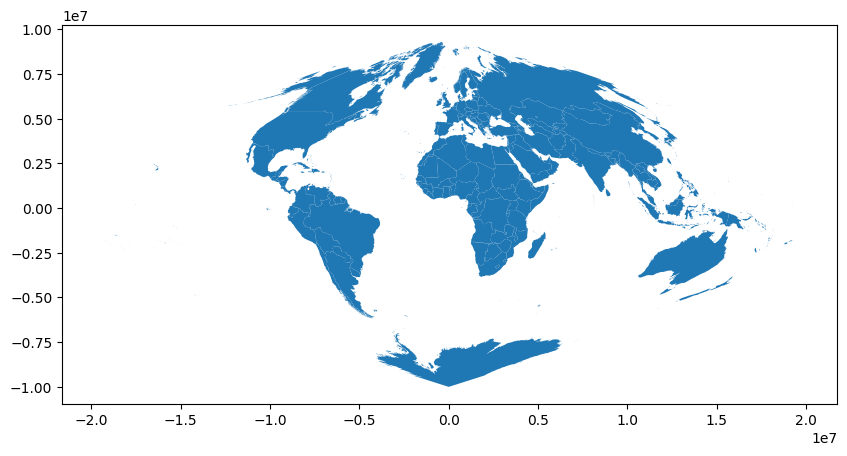

In [9]:
world_sea.plot(figsize=(10,6))

In [10]:
world_sea['area_sqkm_sea'] = world_sea.geometry.area/10**6

In [ ]:
world_sea.head()

,iso,admin,geometry,area_sqkm_cea,area_sqkm_lcea,area_sqkm_sea
0,IDN,Indonesia,"MULTIPOLYGON (((13068358.735 460374.676, 13068...",1.879826e+06,1.879815e+06,1.879815e+06
1,MYS,Malaysia,"MULTIPOLYGON (((13068358.735 460374.676, 13067...",3.278846e+05,3.278847e+05,3.278847e+05
2,CHL,Chile,"MULTIPOLYGON (((-7381665.976 -1936372.301, -73...",7.365950e+05,7.365987e+05,7.365987e+05
3,BOL,Bolivia,"POLYGON ((-7381665.976 -1936372.301, -7381712....",1.086808e+06,1.086808e+06,1.086808e+06
4,PER,Peru,"MULTIPOLYGON (((-7381665.976 -1936372.301, -73...",1.289867e+06,1.289868e+06,1.289868e+06


### Eckert II

In [11]:
world_eckert = world_sea.to_crs('esri:54014')

<Axes: >

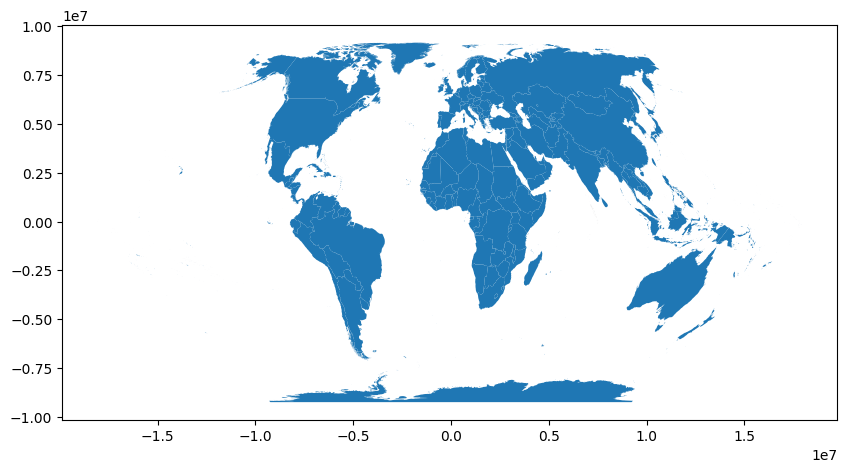

In [ ]:
world_eckert.plot(figsize=(10,6))

In [12]:
world_eckert['area_sqkm_eckert'] = world_eckert.geometry.area/10**6

## Comparing Areas

In [13]:
world_stats = world_eckert[['iso','area_sqkm_cea','area_sqkm_lcea','area_sqkm_sea','area_sqkm_eckert']]
world_stats

,iso,area_sqkm_cea,area_sqkm_lcea,area_sqkm_sea,area_sqkm_eckert
0,IDN,1.879826e+06,1.888276e+06,1.879815e+06,1.892355e+06
1,MYS,3.278846e+05,3.293575e+05,3.278847e+05,3.300730e+05
2,CHL,7.365950e+05,7.364151e+05,7.365987e+05,7.380122e+05
3,BOL,1.086808e+06,1.090529e+06,1.086808e+06,1.092897e+06
4,PER,1.289867e+06,1.295216e+06,1.289868e+06,1.298026e+06
...,...,...,...,...,...
253,CH1,3.007567e+01,3.015529e+01,3.007626e+01,3.022065e+01
254,AU1,2.695492e+00,2.706102e+00,2.695491e+00,2.711974e+00
255,BJN,3.586380e-02,3.599159e-02,3.586396e-02,3.606984e-02
256,SER,1.052888e-01,1.056631e-01,1.052914e-01,1.058929e-01


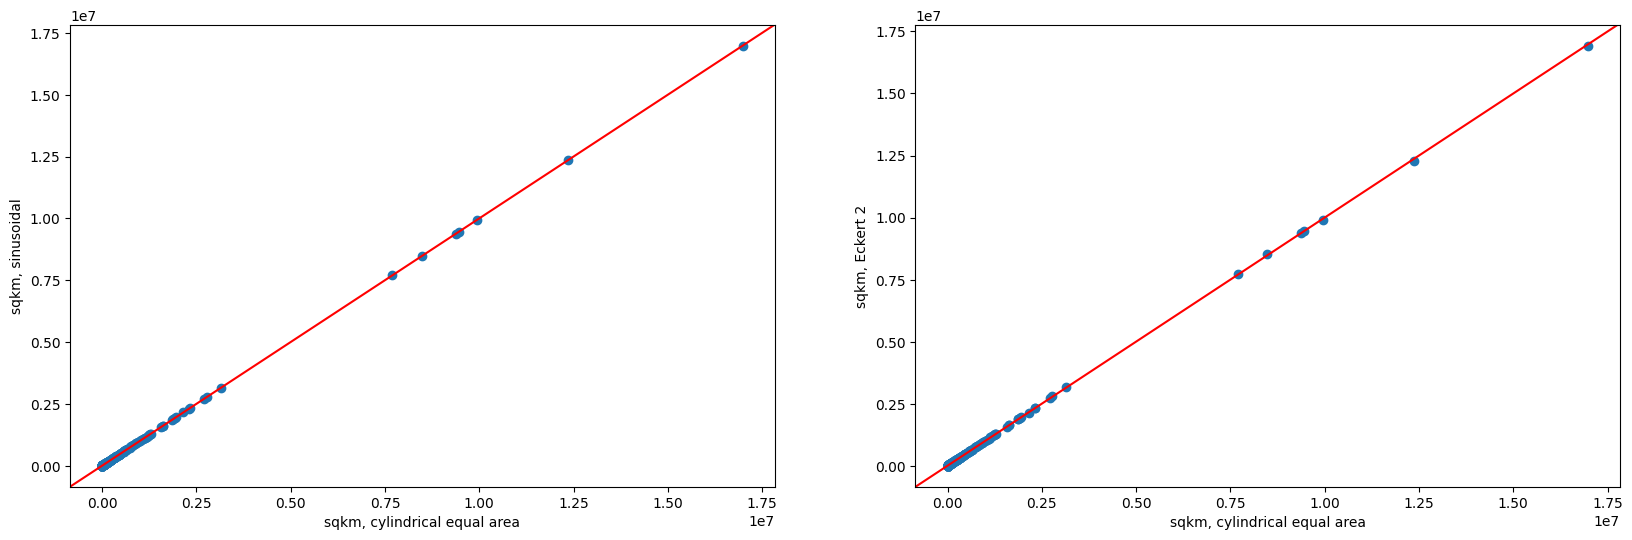

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(world_stats.area_sqkm_cea, world_stats.area_sqkm_sea)
ax[0].set_xlabel('sqkm, cylindrical equal area')
ax[0].set_ylabel('sqkm, sinusoidal')
ax[0].axline([0, 0], [1, 1], color='red')

ax[1].scatter(world_stats.area_sqkm_cea, world_stats.area_sqkm_eckert)
ax[1].set_xlabel('sqkm, cylindrical equal area')
ax[1].set_ylabel('sqkm, Eckert 2')
ax[1].axline([0, 0], [1, 1], color='red')

plt.show()